## Weather data analysis


In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
from windrose import WindroseAxes
from math import pi

import datetime
import sys
#stdout = sys.stdout
#reload(sys)
#sys.setdefaultencoding('utf-8')
#sys.stdout = stdout


/home/adam/Desktop/Desk/Weather_statistsics/windrose/windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
/home/adam/Desktop/Desk/Weather_statistsics/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/adam/Desktop/Desk/Weather_statistsics/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/adam/Desktop/Desk/Weather_statistsics/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.clea

In [2]:
# Reading all the CSV files
# Saving them in one pandas dataframe

path = r'Data/combined'  
#all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
#df_from_each_file = (pd.read_csv(f, header = 10, sep= ';') for f in all_files)

## the following two work for the new format without year, month, date, time
all_files = glob.glob(os.path.join(path, "w*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
df_from_each_file = (pd.read_csv(f, header = 9, sep= ',') for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True, sort=True)  



In [3]:
df.head()

,Geneva CAPE [180-0 mb above gnd],Geneva Cloud Cover High [high cld lay],Geneva Cloud Cover Low [low cld lay],Geneva Cloud Cover Medium [mid cld lay],Geneva Cloud Cover Total,Geneva Diffuse Shortwave Radiation,Geneva Direct Shortwave Radiation,Geneva Evapotranspiration,Geneva FAO Reference Evapotranspiration [2 m],Geneva Geopotential Height [1000 mb],...,Geneva Wind Direction [850 mb],Geneva Wind Direction [900 mb],Geneva Wind Gust,Geneva Wind Speed [10 m],Geneva Wind Speed [500 mb],Geneva Wind Speed [700 mb],Geneva Wind Speed [80 m],Geneva Wind Speed [850 mb],Geneva Wind Speed [900 mb],timestamp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0012,134.0,...,198.43495,185.19443,2.520000,3.878842,2.968636,0.720000,7.517021,6.830519,7.952660,20200601T0000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,137.0,...,207.64598,186.58194,4.320000,4.552245,3.396233,0.509117,8.891344,8.534353,9.422101,20200601T0100
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,141.0,...,214.38034,186.34020,5.040000,5.233930,4.394360,0.509117,9.085988,8.287822,9.779817,20200601T0200
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,144.0,...,214.50853,186.58194,5.760000,5.491976,4.829907,0.804984,8.161764,6.989936,9.422101,20200601T0300
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,145.0,...,201.80140,182.20259,6.479999,5.750785,5.014219,1.138420,8.145870,5.815978,9.366919,20200601T0400


In [4]:
df.describe()
count = df.count()
print(count)

Geneva CAPE [180-0 mb above gnd]                 6384
Geneva Cloud Cover High [high cld lay]           6720
Geneva Cloud Cover Low [low cld lay]             6720
Geneva Cloud Cover Medium [mid cld lay]          6720
Geneva Cloud Cover Total                         6720
Geneva Diffuse Shortwave Radiation               6552
Geneva Direct Shortwave Radiation                6552
Geneva Evapotranspiration                        6384
Geneva FAO Reference Evapotranspiration [2 m]    6384
Geneva Geopotential Height [1000 mb]             5712
Geneva Geopotential Height [500 mb]               168
Geneva Geopotential Height [700 mb]               336
Geneva Geopotential Height [850 mb]               336
Geneva Mean Sea Level Pressure [MSL]             6720
Geneva Precipitation Total                       6720
Geneva Relative Humidity [2 m]                   6720
Geneva Shortwave Radiation                       6720
Geneva Snowfall Amount                           6720
Geneva Soil Moisture [0-10 c

## List of variables

In [5]:
#df["Date"] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
# if new format then parse the timestamp column into pd.to_datetime ; create a function for that
#print(df['timestamp'])
#units = ['°C', '%' ,'hPa' ,'mm' , 'mm' ,'cm' , 'cm' , '%' ,'%' ,'%', '%', 'min', 'W/m2','km/h' , '°' ,'km/h', '°', 'km/h', '°', 'km/h'] #hard coded from the CSV
units = ['W/m2','W/m2', 'mm', 'mm', 'Gpm', 'Gpm', 'Gpm', 'Gpm', 'hPa', 'mm', '%', 'W/m2', 'cm', 'm3/m3', '°C', 'min', '°C', '°C','°C', '°C'] #hard coded from the CSV
print("List of columns and their respective units: \n")

# List of columns
for i, column_name in enumerate(df.columns.values[0:25]):
    if i > 4 :
        print("{} \t {}".format(units[i-5], column_name))
        
        
def time_to_date(timestamp):
    year = int(timestamp[0:4])
    month = int(timestamp[4:6])
    day = int(timestamp[6:8])
    hour = int(timestamp[9:11])
    minute = int(timestamp[11:13])
    #print("year {}".format(timestamp[0:4]))
    #print("month {}".format(timestamp[4:6]))
    #print("day {}".format(timestamp[6:8]))
    #print("hour {}".format(timestamp[9:11]))  
    #print("minute {}".format(timestamp[11:13]))    
    
    return datetime.datetime(year, month, day, hour, minute)


List of columns and their respective units: 

W/m2 	 Geneva Diffuse Shortwave Radiation
W/m2 	 Geneva Direct Shortwave Radiation
mm 	 Geneva Evapotranspiration
mm 	 Geneva FAO Reference Evapotranspiration [2 m]
Gpm 	 Geneva Geopotential Height [1000 mb]
Gpm 	 Geneva Geopotential Height [500 mb]
Gpm 	 Geneva Geopotential Height [700 mb]
Gpm 	 Geneva Geopotential Height [850 mb]
hPa 	 Geneva Mean Sea Level Pressure [MSL]
mm 	 Geneva Precipitation Total
% 	 Geneva Relative Humidity [2 m]
W/m2 	 Geneva Shortwave Radiation
cm 	 Geneva Snowfall Amount
m3/m3 	 Geneva Soil Moisture [0-10 cm down]
°C 	 Geneva Soil Temperature [0-10 cm down]
min 	 Geneva Sunshine Duration
°C 	 Geneva Temperature
°C 	 Geneva Temperature [1000 mb]
°C 	 Geneva Temperature [2 m elevation corrected]
°C 	 Geneva Temperature [700 mb]


In [6]:
## Plot font size
SMALL_SIZE = 8
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



## Temperature and Relative humidity [2 m above gnd]

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


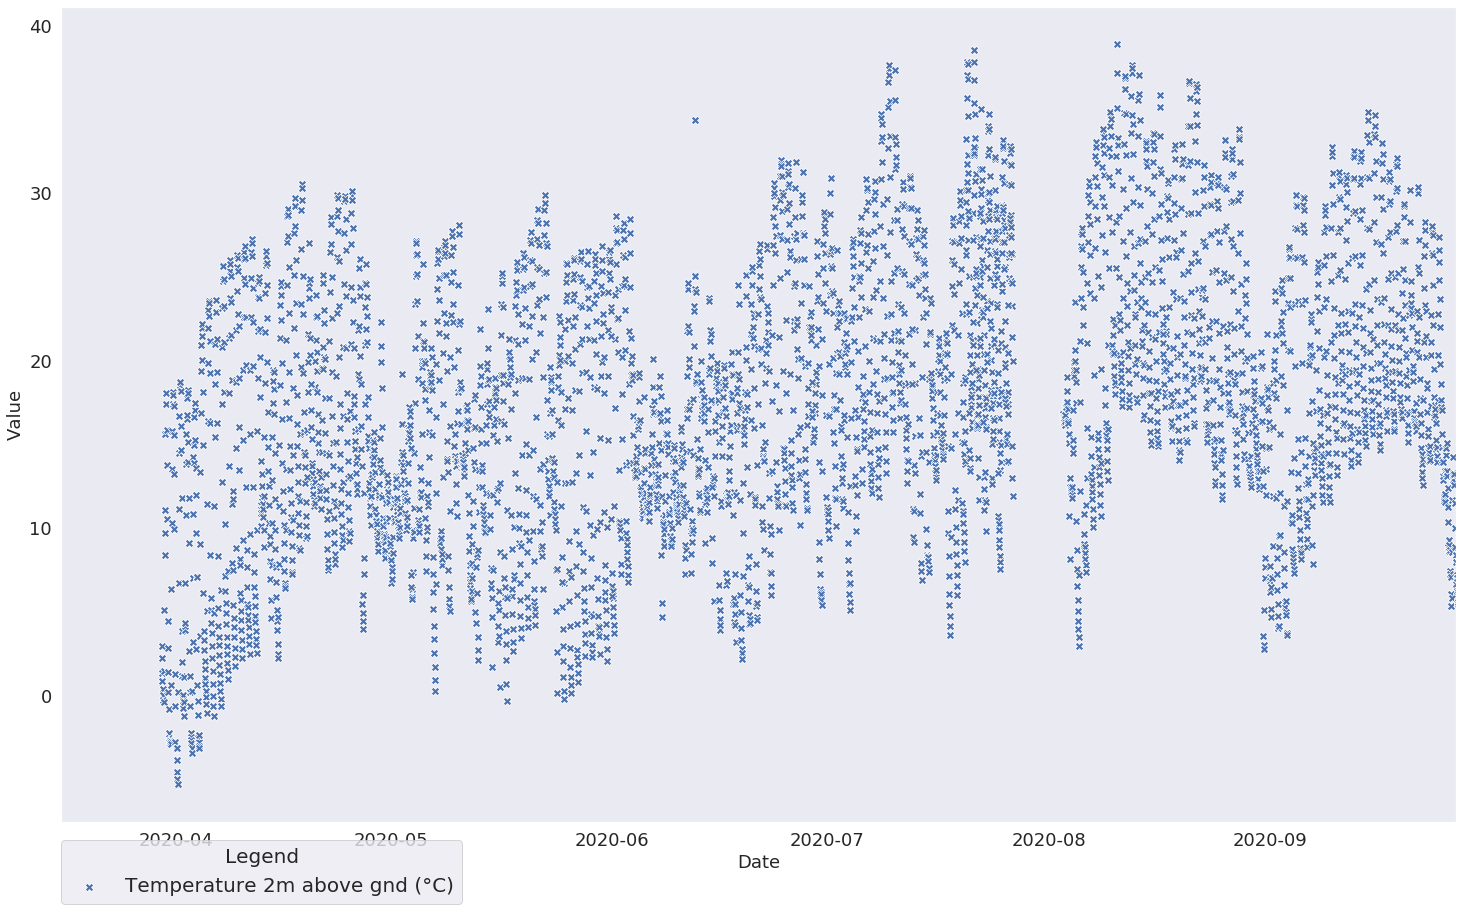

In [7]:
fig = plt.figure(figsize=(25, 15))
ax1 = fig.add_subplot(111)
ax1.grid()

date_column = df["timestamp"].map(str).apply(time_to_date)

ax1 = sns.scatterplot(date_column, df["Geneva Temperature"], data=df, marker='X', s=70, label='Temperature 2m above gnd (°C)')
#ax1 = sns.scatterplot("Date", "Relative Humidity  [2 m above gnd]", data=df, marker='o', s=70, label='Relative humidity 2m above gnd (%)')
#ax1.set_xlim(date_column[0], date_column.iloc[1600])
ax1.set_xlim(datetime.date(2020, 3, 16), datetime.date(2020, 9, 27))
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')
ax1.legend(title="Legend", loc=(0, -0.1))


## Mean Sea Level Pressure

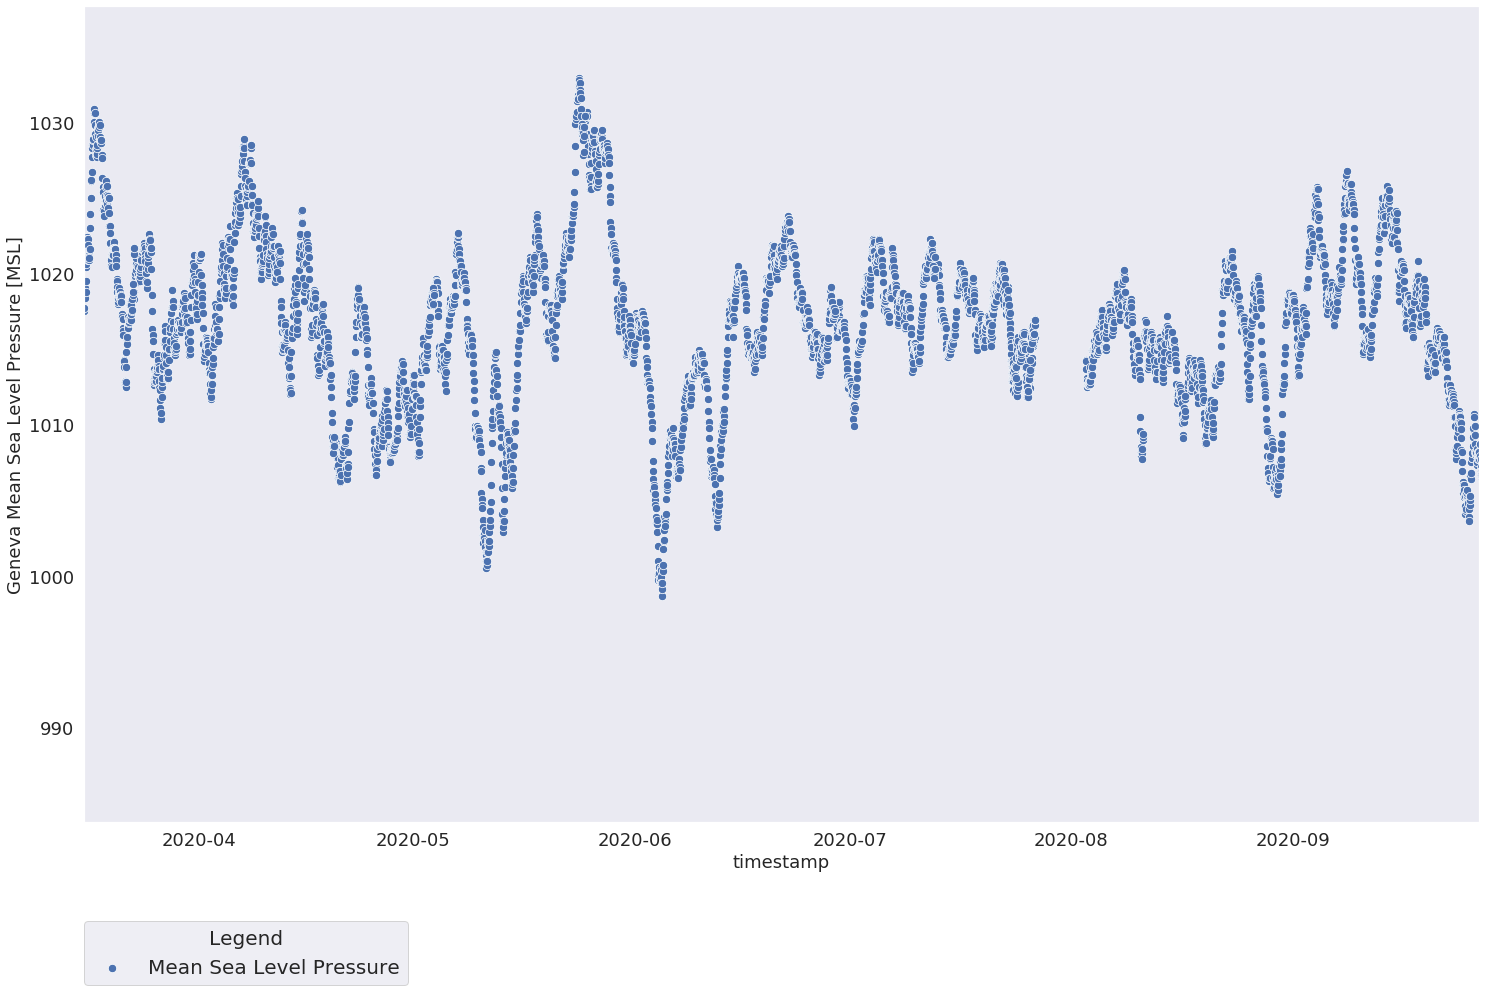

In [8]:
fig = plt.figure(figsize=(25, 15))
ax_pressure = fig.add_subplot(111)
plt.grid()

date_column = df["timestamp"].map(str).apply(time_to_date)

ax_pressure = sns.scatterplot(date_column, df["Geneva Mean Sea Level Pressure [MSL]"], data=df, marker='o', s=70, label='Mean Sea Level Pressure')
#ax_pressure.set_xlim(date_column[0], date_column.iloc[-1])
ax_pressure.set_xlim(datetime.date(2020, 3, 16), datetime.date(2020, 9, 27))

ax_pressure.set_xlabel('timestamp')
ax_pressure.set_ylabel('Geneva Mean Sea Level Pressure [MSL]')
ax_pressure.legend(title="Legend", loc=(0, -0.2))

## Shortwave Radiation (or Global Horizontal Irradiance)

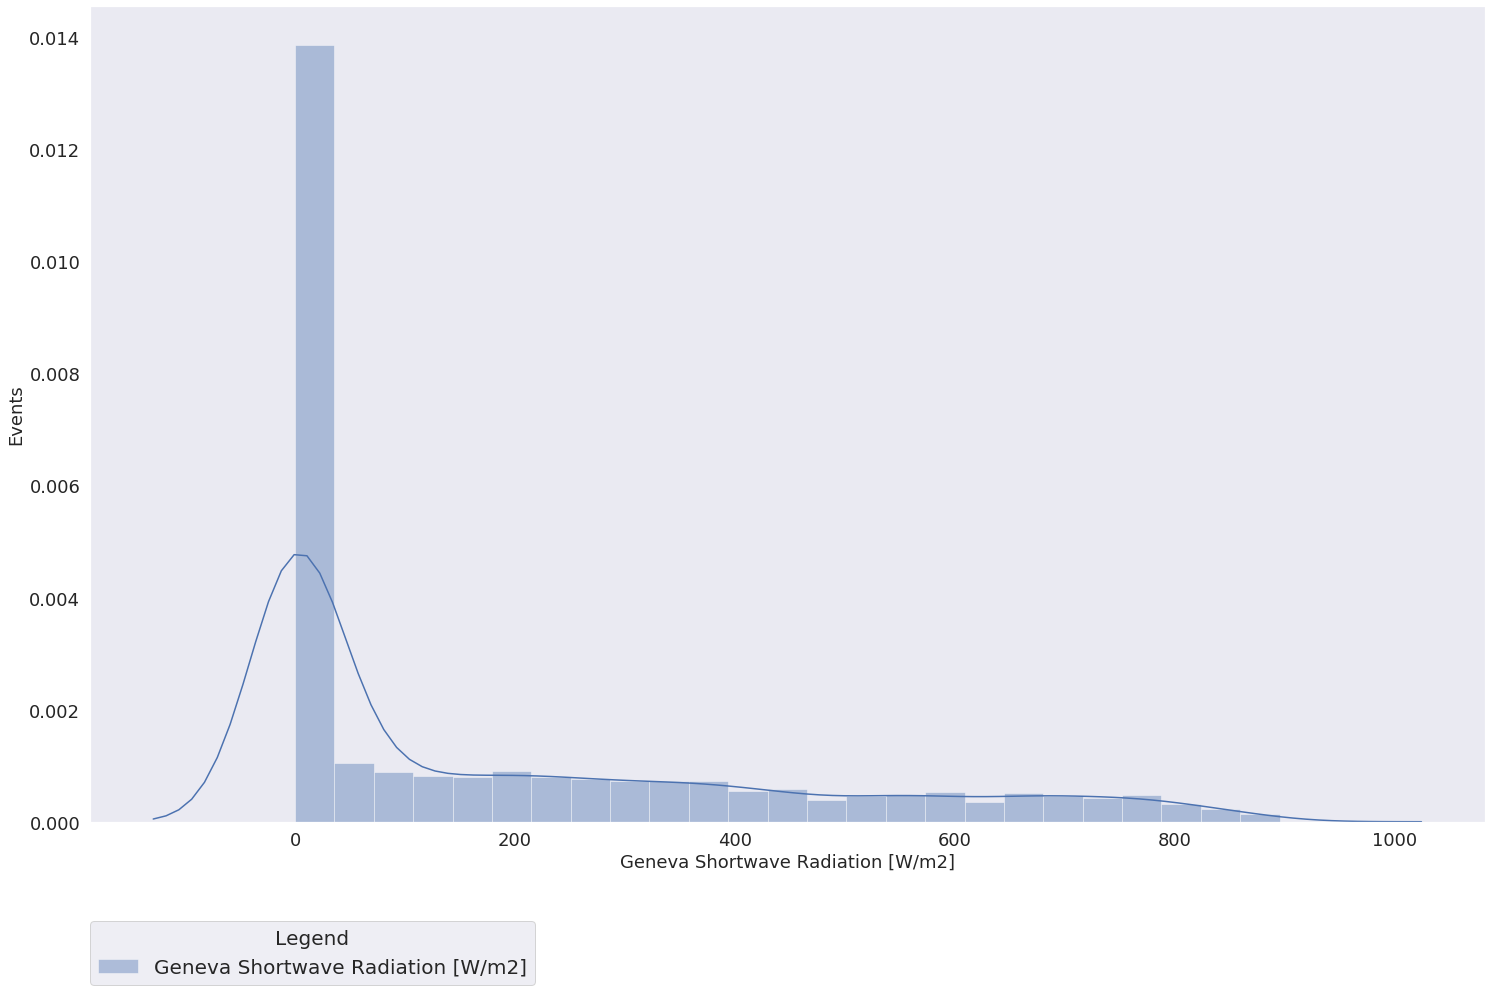

In [9]:
fig = plt.figure(figsize=(25, 15))
ax_radiation = fig.add_subplot(111)
ax_radiation.grid()

ax_radiation = sns.distplot(df["Geneva Shortwave Radiation"], label='Geneva Shortwave Radiation [W/m2]')
ax_radiation.set_xlabel('Geneva Shortwave Radiation [W/m2]')
ax_radiation.set_ylabel('Events')
ax_radiation.legend(title="Legend", loc=(0, -0.2))

## Sunshine duration

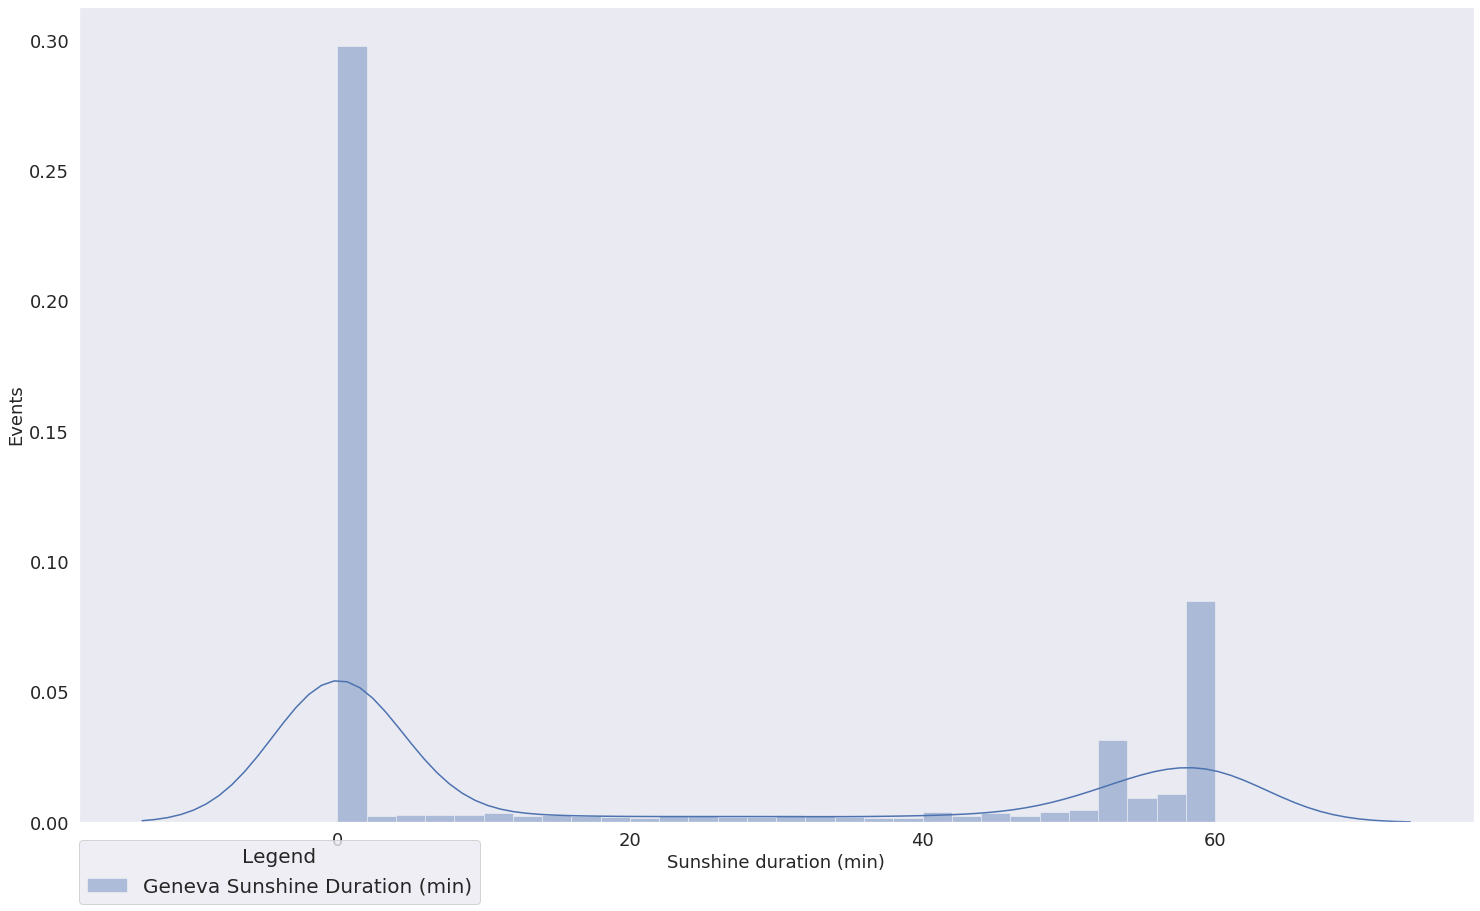

In [10]:
fig = plt.figure(figsize=(25, 15))
ax_sunshine_duration = fig.add_subplot(111)
ax_sunshine_duration.grid()

ax_sunshine_duration = sns.distplot(df["Geneva Sunshine Duration"], bins=30, label='Geneva Sunshine Duration (min)')
ax_sunshine_duration.set_xlabel('Sunshine duration (min)')
ax_sunshine_duration.set_ylabel('Events')
ax_sunshine_duration.legend(title="Legend", loc=(0, -0.1))
#ax_sunshine_duration.set_xlim(0, 70)


## Wind speed

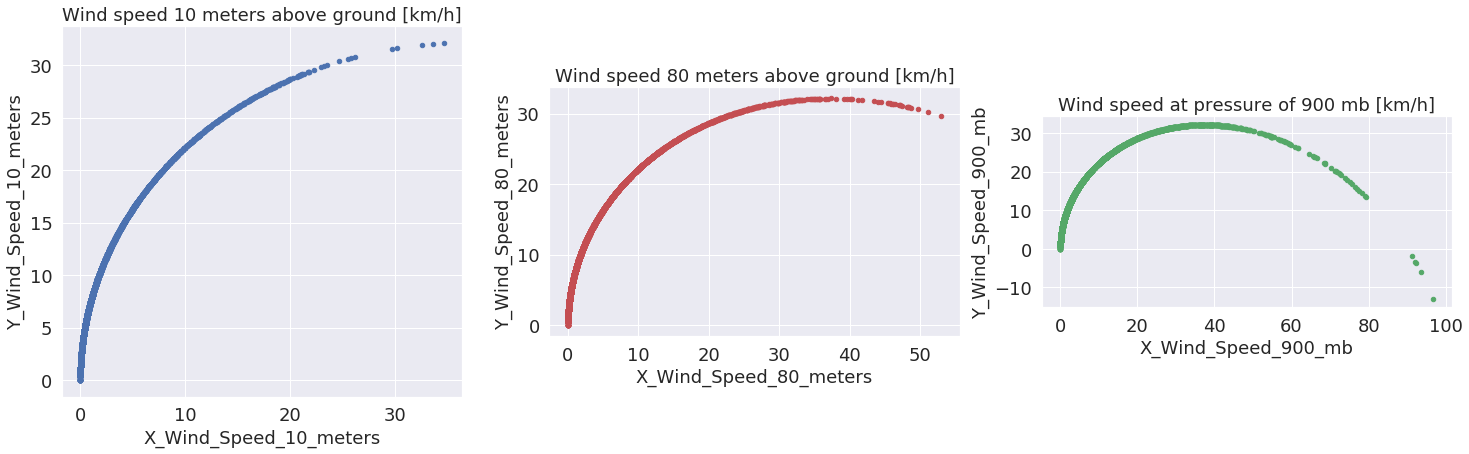

In [11]:
fig = plt.figure(figsize=(25, 15))

df['X_Wind_Speed_10_meters'] = df['Geneva Wind Speed [10 m]'] * np.sin(df['Geneva Wind Speed [10 m]'] * pi / 180.0)
df['Y_Wind_Speed_10_meters'] = df['Geneva Wind Speed [10 m]'] * np.cos(df['Geneva Wind Speed [10 m]'] * pi / 180.0)
df['X_Wind_Speed_80_meters'] = df['Geneva Wind Speed [80 m]'] * np.sin(df['Geneva Wind Speed [80 m]'] * pi / 180.0)
df['Y_Wind_Speed_80_meters'] = df['Geneva Wind Speed [80 m]'] * np.cos(df['Geneva Wind Speed [80 m]'] * pi / 180.0)
df['X_Wind_Speed_900_mb'] = df['Geneva Wind Speed [900 mb]'] * np.sin(df['Geneva Wind Speed [900 mb]'] * pi / 180.0)
df['Y_Wind_Speed_900_mb'] = df['Geneva Wind Speed [900 mb]'] * np.cos(df['Geneva Wind Speed [900 mb]'] * pi / 180.0)

ax3 = fig.add_subplot(2, 3, 1)
ax4 = fig.add_subplot(2, 3, 2)
ax5 = fig.add_subplot(2, 3, 3)


ax3.set_aspect('equal')
ax3.set_title('Wind speed 10 meters above ground [km/h]')
ax3 = df.plot(kind='scatter', x='X_Wind_Speed_10_meters', y='Y_Wind_Speed_10_meters', ax=ax3, color='b')


ax4.set_aspect('equal')
ax4.set_title('Wind speed 80 meters above ground [km/h]')
ax4 = df.plot(kind='scatter', x='X_Wind_Speed_80_meters', y='Y_Wind_Speed_80_meters', ax=ax4, color='r')

ax5.set_aspect('equal')
ax5.set_title('Wind speed at pressure of 900 mb [km/h]')
ax5 = df.plot(kind='scatter', x='X_Wind_Speed_900_mb', y='Y_Wind_Speed_900_mb', ax=ax5, color='g')



## Wind plots

<Figure size 1800x1080 with 0 Axes>

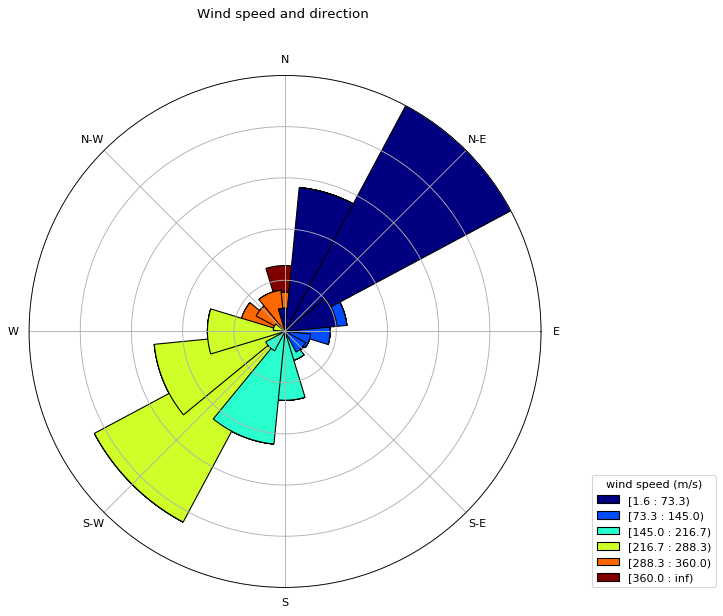

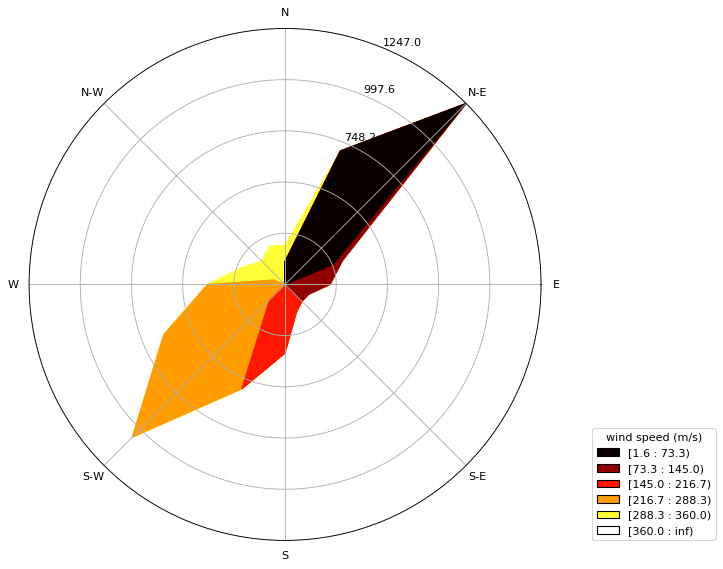

In [12]:
fig = plt.figure(figsize=(25, 15))


plt.style.use('default') #To switch to seaborn use plt.style.use('seaborn') 


ax6 = WindroseAxes.from_ax()
ax6.bar(df['Geneva Wind Direction [80 m]'], df['Geneva Wind Direction [80 m]'], normed=True, opening=1.5, edgecolor='black')
ax6.set_title("Wind speed and direction ", position=(0.5, 1.1))
ax6.set_yticklabels([])
ax6.set_legend()
ax6.legend(title="wind speed (m/s)", loc=(1.1, 0))

ax7 = WindroseAxes.from_ax()
ax7.contourf(df['Geneva Wind Direction [80 m]'], df['Geneva Wind Direction [80 m]'], cmap=cm.hot)
ax7.legend(title="wind speed (m/s)", loc=(1.1, 0))





## Correlation between variables

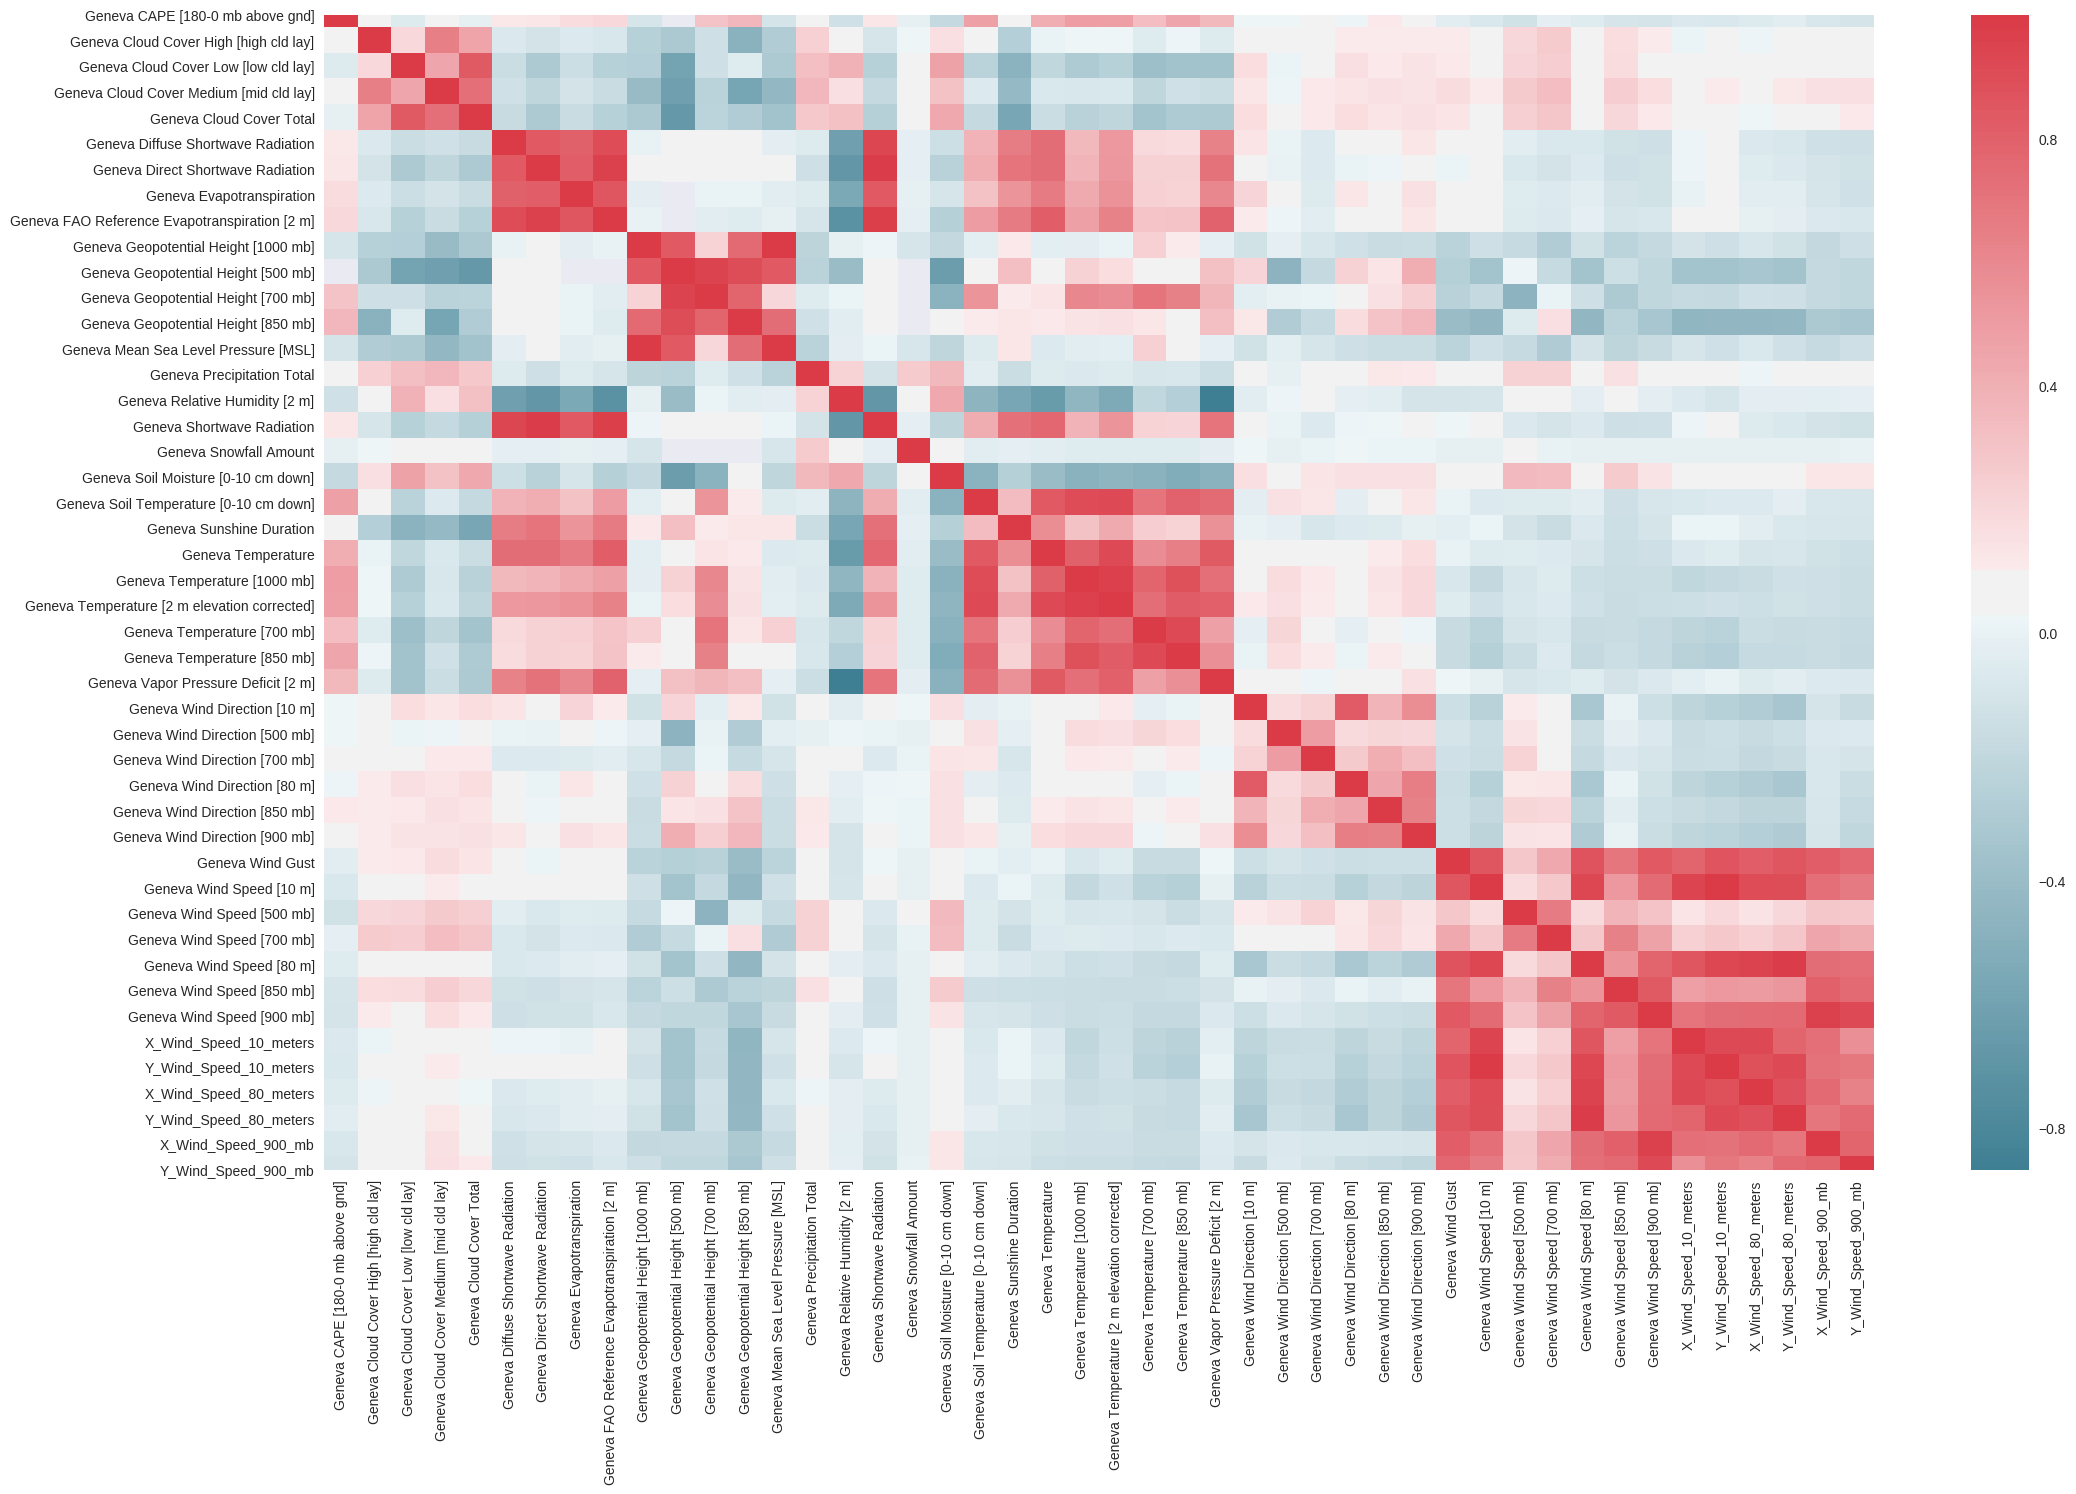

In [13]:
plt.style.use('seaborn') 
fig = plt.figure(figsize=(25, 15))
ax2 = fig.add_subplot(111)
corr = df.loc[:,df.dtypes == 'float64'].corr()
ax2 = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))
